In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, roc_auc_score
from sklearn.feature_selection import SelectKBest, f_regression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, SimpleRNN
from tensorflow.keras.optimizers import Adam

# 훈련 phenotype data
train_pheno_conti = pd.read_csv('pheno_n300_conti.phe', header=None, delim_whitespace=True)
train_pheno_binary = pd.read_csv('pheno_n300_binary.phe', header=None, delim_whitespace=True)

# 테스트 phenotype data
test_pheno_conti = pd.read_csv('pheno_n150_conti.phe', header=None, delim_whitespace=True)
test_pheno_binary = pd.read_csv('pheno_n150_binary.phe', header=None, delim_whitespace=True)

# 훈련 genotype data
train_genotype = pd.read_csv('sim_n300_p1000.mldose', header=None, delim_whitespace=True)
train_genotype_info = pd.read_csv('sim_n300_p1000.mlinfo', header=None, delim_whitespace=True)

# 테스트 genotype data
test_genotype = pd.read_csv('sim_n150_p1000.mldose', header=None, delim_whitespace=True)
test_genotype_info = pd.read_csv('sim_n150_p1000.mlinfo', header=None, delim_whitespace=True)

# 반응변수 추출
train_response_conti = train_pheno_conti.iloc[:, 2]
train_response_binary = train_pheno_binary.iloc[:, 2]
test_response_conti = test_pheno_conti.iloc[:, 2]
test_response_binary = test_pheno_binary.iloc[:, 2]

scaler = StandardScaler()
train_genotype_scaled = scaler.fit_transform(train_genotype.iloc[:, 2:])
test_genotype_scaled = scaler.transform(test_genotype.iloc[:, 2:])

X_train_conti, X_val_conti, y_train_conti, y_val_conti = train_test_split(train_genotype_scaled, train_response_conti, test_size=0.2, random_state=42)
X_train_binary, X_val_binary, y_train_binary, y_val_binary = train_test_split(train_genotype_scaled, train_response_binary, test_size=0.2, random_state=42)


In [82]:
train_genotype_scaled

array([[-0.47263139,  0.79591581, -1.52676305, ..., -1.08292408,
         0.41374212,  0.65557213],
       [-0.43069073,  0.79591581,  0.63224066, ..., -0.04414798,
         0.41374212,  0.65557213],
       [-0.47263139,  0.7975583 , -1.52825202, ..., -1.45391554,
         0.39026517,  0.65029079],
       ...,
       [-0.47263139,  0.79427333, -1.52825202, ..., -0.02559841,
         0.41374212,  0.65733257],
       [-0.0142798 ,  0.7975583 , -1.52676305, ...,  1.38844981,
         0.41374212, -0.68588699],
       [ 1.96891469, -0.81700533, -0.0645964 , ..., -0.69052926,
         0.41374212, -1.1083938 ]])

In [81]:
train_genotype

,0,1,2,3,4,5,6,7,8,9,...,992,993,994,995,996,997,998,999,1000,1001
0,1,1,0.000,1.999,0.002,0.002,0.064,0.997,0.000,0.998,...,1.999,2.000,1.999,2.000,2.000,1.989,0.000,0.267,2.000,1.999
1,2,2,0.014,1.999,1.452,1.007,1.482,1.952,0.067,0.998,...,0.001,0.000,0.000,1.999,2.000,1.014,0.004,0.995,2.000,1.999
2,3,3,0.000,2.000,0.001,1.020,1.980,1.998,1.996,2.000,...,2.000,2.000,1.999,1.010,1.002,1.264,0.000,0.007,1.992,1.996
3,4,4,0.754,1.995,1.001,2.000,1.996,1.999,0.000,1.999,...,0.999,1.000,0.999,1.065,1.027,1.993,0.176,0.025,2.000,2.000
4,5,5,0.001,0.961,1.999,2.000,1.998,1.999,0.000,1.213,...,2.000,2.000,1.999,1.999,2.000,1.996,0.000,0.999,2.000,1.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,296,0.001,1.002,1.002,2.000,0.428,0.979,0.000,0.214,...,1.000,1.000,0.999,1.989,2.000,1.975,0.993,1.031,1.999,1.001
296,297,297,0.000,1.003,1.001,2.000,1.987,1.999,0.998,1.000,...,1.000,1.000,1.000,2.000,1.999,1.998,0.000,0.006,2.000,2.000
297,298,298,0.000,1.998,0.001,1.992,1.000,2.000,0.999,1.000,...,0.000,0.000,0.000,2.000,2.000,2.000,0.997,1.008,2.000,2.000
298,299,299,0.153,2.000,0.002,1.339,1.993,1.999,0.000,1.999,...,1.000,1.000,1.000,2.000,2.000,2.000,0.000,1.999,2.000,1.237


In [77]:
# Reshape genotype data for RNN input
X_train_rnn = X_train_conti.reshape(X_train_conti.shape[0], 1, X_train_conti.shape[1])
X_val_rnn = X_val_conti.reshape(X_val_conti.shape[0], 1, X_val_conti.shape[1])
test_genotype_rnn = test_genotype_scaled.reshape(test_genotype_scaled.shape[0], 1, test_genotype_scaled.shape[1])

# Define RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=64, input_shape=(1, X_train_conti.shape[1])))
model_rnn.add(Dense(1, activation='linear'))

# Compile RNN model
model_rnn.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train RNN model
model_rnn.fit(X_train_rnn, y_train_conti, validation_data=(X_val_rnn, y_val_conti), epochs=50, batch_size=32, verbose=1)

# Predict using RNN model
y_pred_rnn = model_rnn.predict(test_genotype_rnn)

# Evaluate RNN model
rnn_mse = mean_squared_error(test_response_conti, y_pred_rnn)
print("RNN Mean Squared Error:", rnn_mse)


C:\Users\BossMonster\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.1469 - val_loss: 1.5538
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5445 - val_loss: 1.4531
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2282 - val_loss: 1.4021
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1068 - val_loss: 1.3661
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0559 - val_loss: 1.3482
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0453 - val_loss: 1.3647
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0270 - val_loss: 1.3481
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0103 - val_loss: 1.3361
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0062 - val_loss: 1.3272
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0034 - val_loss: 1.3352
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0023 - val_loss: 1.3355
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0018 - val_loss: 1.3286
Epo

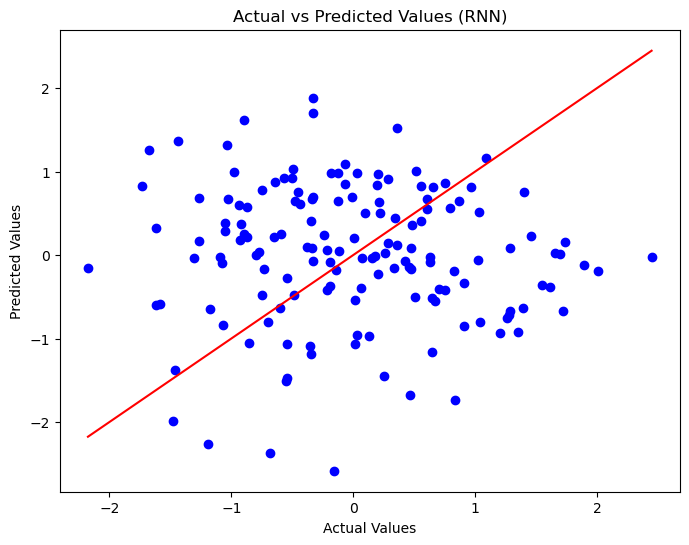

In [83]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(test_response_conti, y_pred_rnn, color='blue')
plt.plot([min(test_response_conti), max(test_response_conti)], [min(test_response_conti), max(test_response_conti)], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (RNN)')
plt.show()


In [84]:
from keras.layers import Conv1D, MaxPooling1D, Flatten

# Reshape genotype data for CNN input
X_train_cnn = X_train_conti.reshape(X_train_conti.shape[0], X_train_conti.shape[1], 1)
X_val_cnn = X_val_conti.reshape(X_val_conti.shape[0], X_val_conti.shape[1], 1)
test_genotype_cnn = test_genotype_scaled.reshape(test_genotype_scaled.shape[0], test_genotype_scaled.shape[1], 1)

# Define CNN model
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_conti.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dense(1, activation='linear'))

# Compile CNN model
model_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train CNN model
history = model_cnn.fit(X_train_cnn, y_train_conti, validation_data=(X_val_cnn, y_val_conti), epochs=50, batch_size=32, verbose=1)

# Predict using CNN model
y_pred_cnn = model_cnn.predict(test_genotype_cnn)

# Evaluate CNN model
cnn_mse = mean_squared_error(test_response_conti, y_pred_cnn)
print("CNN Mean Squared Error:", cnn_mse)


Epoch 1/50


C:\Users\BossMonster\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 10.0478 - val_loss: 1.6374
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.8484 - val_loss: 0.9275
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.1683 - val_loss: 0.9473
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.7840 - val_loss: 0.9256
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6369 - val_loss: 0.8474
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5312 - val_loss: 0.8101
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4909 - val_loss: 0.7744
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4171 - val_loss: 0.7526
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3226 - val_loss: 0.7384
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2834 - val_loss: 0.7102
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2437 - val_loss: 0.7082
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2343 - val_loss: 0.6833
Epoch 13/50

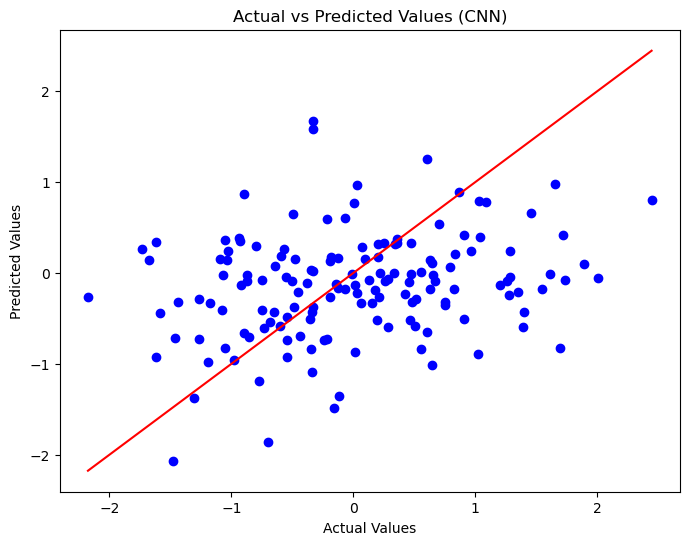

In [87]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(test_response_conti, y_pred_cnn, color='blue')
plt.plot([min(test_response_conti), max(test_response_conti)], [min(test_response_conti), max(test_response_conti)], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (CNN)')
plt.show()



In [88]:
#(epoch 48: VAL_LOSS:1.318)
best_model1 = model_rnn
best_model2 = model_cnn

# 예측
y_pred_test1 = best_model1.predict(test_genotype_rnn)
y_pred_test2 = best_model2.predict(test_genotype_cnn)

#  MSE
mse_rnn = mean_squared_error(test_response_conti, y_pred_test1)
mse_cnn = mean_squared_error(test_response_conti, y_pred_test2)

print("MSE_RNN:", mse_rnn)
print("MSE_CNN:", mse_cnn)



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
MSE_RNN: 1.5751013855798173
MSE_CNN: 0.9055248605497567


In [80]:
#모델이 이진 분류 문제로 사용되는 경우에 정확도 측정
threshold = train_response_conti.mean()  # 예시로 평균값을 기준으로 이진 분류

train_response_binary = (train_response_conti > threshold).astype(int)
test_response_binary = (test_response_conti > threshold).astype(int)

binary_model = Sequential()
binary_model.add(Dense(64, activation='relu', input_shape=(train_genotype_scaled.shape[1],)))
binary_model.add(Dense(1, activation='sigmoid'))
binary_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

binary_model.fit(train_genotype_scaled, train_response_binary, epochs=50, batch_size=32, verbose=1)

accuracy = binary_model.evaluate(test_genotype_scaled, test_response_binary)[1]
print("Accuracy:", accuracy)


Epoch 1/50


C:\Users\BossMonster\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4921 - loss: 0.9125
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8502 - loss: 0.3766 
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.1735 
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0963 
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0668 
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0441 
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0356 
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0289 
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0228 
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0194 
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0164 
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - los